### LAPTOP

In [29]:
import json
import logging
import requests
from bs4 import BeautifulSoup


def extract_post_request(request):
    try:
        return json.loads(request.body.decode('utf-8'))
    except ValueError as err:
        logging.error(err)
        return {}


def crawl_website(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    
    # Raise error if the request fails
    response.raise_for_status()
    
    return response.content

def extract_product_list(html):
    soup = BeautifulSoup(html, "html.parser")
    products = []
    product_items = soup.find_all('li', class_='item')
    print(len(product_items))
    for product in product_items:
        try:
            title = product.find('a').text.strip()

        except AttributeError:
            title = 'N/A'
        
        try:
            price = product['data-price']
        except KeyError:
            price = 'N/A'

        products.append({'title': title, 'price': price})
    
    return products

def process_to_df(data):
    data


def create_logger(name, level=logging.DEBUG):
    logging.basicConfig(format="%(asctime)s %(levelname)s: %(message)s")
    logger = logging.getLogger(name)
    logger.setLevel(level)
    logger.addHandler(logging.StreamHandler())
    return logger





if __name__ == '__main__':
    result = crawl_website("https://www.thegioididong.com/laptop#c=44&o=13&pi=14")
    print(extract_product_list(result))

20
[{'title': 'Trả góp 0%\n\n\n\n\n\nTặng Office\n\n            Asus Vivobook Go 15 E1504FA R5 7520U (NJ776W)\n        \n\nRAM 16 GB\nSSD 512 GB\n\nOnline giá rẻ quá\n12.590.000₫\n\n14.490.000₫\n-13%\n\nQuà 1.090.000₫', 'price': '14490000.0'}, {'title': 'Trả góp 0%\n\n\n\n\n\n            Dell Inspiron 15 3520 i5 1235U (N5I5052W1)\n        \n\nRAM 16 GB\nSSD 512 GB\n\n16.490.000₫\n\n16.990.000₫\n\nQuà 100.000₫', 'price': '16990000.0'}, {'title': 'Trả góp 0%\n\n\n\n\nTặng Office\n\n            HP 15 fd0234TU i5 1334U (9Q969PA)\n        \n\nRAM 16 GB\nSSD 512 GB\n\n16.490.000₫\n\n19.790.000₫\n-16%\n\nQuà 1.190.000₫', 'price': '19790000.0'}, {'title': 'Trả góp 0%\n\n\n\n\nTặng Office\n\n            Lenovo Ideapad Slim 3 15IAH8 i5 12450H (83ER000EVN)\n        \n\nRAM 16 GB\nSSD 512 GB\n\n14.290.000₫\n\n15.990.000₫\n-10%\n\nQuà 1.090.000₫', 'price': '15990000.0'}, {'title': 'Trả góp 0%\n\n\n\n\nTặng Office\n\n            HP 15 fc0085AU R5 7430U (A6VV8PA)\n        \n\nRAM 16 GB\nSSD 512 GB\

In [30]:
result = crawl_website("https://www.thegioididong.com/laptop")
data= (extract_product_list(result))
data

20


[{'title': 'Trả góp 0%\n\n\n\n\n\nTặng Office\n\n            Asus Vivobook Go 15 E1504FA R5 7520U (NJ776W)\n        \n\nRAM 16 GB\nSSD 512 GB\n\nOnline giá rẻ quá\n12.590.000₫\n\n14.490.000₫\n-13%\n\nQuà 1.090.000₫',
  'price': '14490000.0'},
 {'title': 'Trả góp 0%\n\n\n\n\n\n            Dell Inspiron 15 3520 i5 1235U (N5I5052W1)\n        \n\nRAM 16 GB\nSSD 512 GB\n\n16.490.000₫\n\n16.990.000₫\n\nQuà 100.000₫',
  'price': '16990000.0'},
 {'title': 'Trả góp 0%\n\n\n\n\nTặng Office\n\n            HP 15 fd0234TU i5 1334U (9Q969PA)\n        \n\nRAM 16 GB\nSSD 512 GB\n\n16.490.000₫\n\n19.790.000₫\n-16%\n\nQuà 1.190.000₫',
  'price': '19790000.0'},
 {'title': 'Trả góp 0%\n\n\n\n\nTặng Office\n\n            Lenovo Ideapad Slim 3 15IAH8 i5 12450H (83ER000EVN)\n        \n\nRAM 16 GB\nSSD 512 GB\n\n14.290.000₫\n\n15.990.000₫\n-10%\n\nQuà 1.090.000₫',
  'price': '15990000.0'},
 {'title': 'Trả góp 0%\n\n\n\n\nTặng Office\n\n            HP 15 fc0085AU R5 7430U (A6VV8PA)\n        \n\nRAM 16 GB\nSS

In [31]:
import pandas as pd
df = pd.DataFrame(data)

In [32]:
df

,title,price
0,Trả góp 0%\n\n\n\n\n\nTặng Office\n\n ...,14490000.0
1,Trả góp 0%\n\n\n\n\n\n Dell Inspiro...,16990000.0
2,Trả góp 0%\n\n\n\n\nTặng Office\n\n ...,19790000.0
3,Trả góp 0%\n\n\n\n\nTặng Office\n\n ...,15990000.0
4,Trả góp 0%\n\n\n\n\nTặng Office\n\n ...,15190000.0
5,Trả góp 0%\n\n\n\n\nTặng Office\n\n ...,12290000.0
6,Trả góp 0%\n\n\n\n\nTặng Office\n\n ...,14390000.0
7,Mẫu mới\nTrả góp 0%\n\n\n\n\nTặng Office\n\n ...,10990000.0
8,Trả góp 0%\n\n\n\n\n\n MacBook Air ...,19990000.0
9,Trả góp 0%\n\n\n\n\nTặng Office\n\n ...,19990000.0


In [33]:
df['title'] = df['title'].replace('\n', '', regex=True)
df['title']

0     Trả góp 0%Tặng Office            Asus Vivobook...
1     Trả góp 0%            Dell Inspiron 15 3520 i5...
2     Trả góp 0%Tặng Office            HP 15 fd0234T...
3     Trả góp 0%Tặng Office            Lenovo Ideapa...
4     Trả góp 0%Tặng Office            HP 15 fc0085A...
5     Trả góp 0%Tặng Office            Asus Vivobook...
6     Trả góp 0%Tặng Office            Lenovo Ideapa...
7     Mẫu mớiTrả góp 0%Tặng Office            Acer A...
8     Trả góp 0%            MacBook Air 13 inch M1  ...
9     Trả góp 0%Tặng Office            Asus Vivobook...
10    Trả góp 0%Tặng Office            HP 15 fd0303T...
11    Trả góp 0%Tặng Office            Acer Aspire 3...
12    Trả góp 0%            Dell Inspiron 15 3520 i5...
13    Trả góp 0%Tặng Office            Asus Vivobook...
14    Mẫu mớiTrả góp 0%Tặng Office            HP 240...
15    Trả góp 0%Tặng Office            Lenovo Gaming...
16    Trả góp 0%Tặng Office            Acer Aspire L...
17    Trả góp 0%Tặng Office            Asus Gami

In [34]:
def split_title(title):
    thanh_toan = 'Trả góp 0%' if 'Trả góp 0%' in title else 'N/A'
    qua_tang = 'Office' if 'Tặng Office' in title else 'N/A'
    ten_san_pham = title.replace('Trả góp 0%', '').replace('Tặng Office', '').strip()
    
    return thanh_toan, qua_tang, ten_san_pham

# Áp dụng hàm split_title để chia cột 'title' thành các cột riêng biệt
df[['Payment', 'Gift', 'Product_Name']] = df['title'].apply(lambda x: pd.Series(split_title(x)))

# Hiển thị kết quả
print(df[['Payment', 'Gift', 'Product_Name']])

       Payment    Gift                                       Product_Name
0   Trả góp 0%  Office  Asus Vivobook Go 15 E1504FA R5 7520U (NJ776W) ...
1   Trả góp 0%     N/A  Dell Inspiron 15 3520 i5 1235U (N5I5052W1)    ...
2   Trả góp 0%  Office  HP 15 fd0234TU i5 1334U (9Q969PA)        RAM 1...
3   Trả góp 0%  Office  Lenovo Ideapad Slim 3 15IAH8 i5 12450H (83ER00...
4   Trả góp 0%  Office  HP 15 fc0085AU R5 7430U (A6VV8PA)        RAM 1...
5   Trả góp 0%  Office  Asus Vivobook 15 X1504ZA i3 1215U (NJ102W)    ...
6   Trả góp 0%  Office  Lenovo Ideapad Slim 3 15AMN8 R5 7520U (82XQ00J...
7   Trả góp 0%  Office  Mẫu mới            Acer Aspire 3 A315 58 529V ...
8   Trả góp 0%     N/A  MacBook Air 13 inch M1        RAM 8 GBSSD 256 ...
9   Trả góp 0%  Office  Asus Vivobook 15 OLED A1505ZA i5 12500H (MA415...
10  Trả góp 0%  Office  HP 15 fd0303TU i3 1315U (A2NL4PA)        RAM 8...
11  Trả góp 0%  Office  Acer Aspire 3 A315 44P R9W8 R7 5700U (NX.KSJSV...
12  Trả góp 0%     N/A  Dell Inspiron 

In [35]:
df['Product_Name']

0     Asus Vivobook Go 15 E1504FA R5 7520U (NJ776W) ...
1     Dell Inspiron 15 3520 i5 1235U (N5I5052W1)    ...
2     HP 15 fd0234TU i5 1334U (9Q969PA)        RAM 1...
3     Lenovo Ideapad Slim 3 15IAH8 i5 12450H (83ER00...
4     HP 15 fc0085AU R5 7430U (A6VV8PA)        RAM 1...
5     Asus Vivobook 15 X1504ZA i3 1215U (NJ102W)    ...
6     Lenovo Ideapad Slim 3 15AMN8 R5 7520U (82XQ00J...
7     Mẫu mới            Acer Aspire 3 A315 58 529V ...
8     MacBook Air 13 inch M1        RAM 8 GBSSD 256 ...
9     Asus Vivobook 15 OLED A1505ZA i5 12500H (MA415...
10    HP 15 fd0303TU i3 1315U (A2NL4PA)        RAM 8...
11    Acer Aspire 3 A315 44P R9W8 R7 5700U (NX.KSJSV...
12    Dell Inspiron 15 3520 i5 1235U        RAM 16 G...
13    Asus Vivobook X1404ZA i5 1235U (NK376W)       ...
14    Mẫu mới            HP 240 G9 i5 1235U (AG2J7AT...
15    Lenovo Gaming LOQ 15IAX9 i5 12450HX (83GS000JV...
16    Acer Aspire Lite 14 51M 36MH i3 1215U (NX.KTVS...
17    Asus Gaming Vivobook K3605ZF i5 12500H (RP

In [36]:
import re
def extract_info(title):
    clean_title = title.replace('\n', ' ').strip()
    
    product_name = re.search(r'(?<=Tặng Office)(.*?)(?=RAM)', clean_title)
    if not product_name:
        product_name = re.search(r'(?<=Trả góp 0%)(.*?)(?=RAM)', clean_title)
    product_name = product_name.group(0).strip() if product_name else 'N/A'
    
    ram = re.search(r'RAM (\d+ GB)', clean_title)
    ram = ram.group(1) if ram else 'N/A'
    
    ssd = re.search(r'SSD (\d+ GB)', clean_title)
    ssd = ssd.group(1) if ssd else 'N/A'
    
    price = re.search(r'(\d{1,3}(?:\.\d{3}){2,})₫', clean_title)
    price = price.group(0) if price else 'N/A'
    
    previous_price = re.findall(r'(\d{1,3}(?:\.\d{3}){2,})₫', clean_title)
    previous_price = previous_price[1] if len(previous_price) > 1 else 'N/A'
    
    promote = re.search(r'-\d{1,2}%', clean_title)
    promote = promote.group(0) if promote else 'N/A'
    
    gift = re.search(r'Quà (\d{1,3}(?:\.\d{3}){2,})₫', clean_title)
    gift = gift.group(1) if gift else 'N/A'

    status = 1 if 'Mẫu mới' in clean_title else 0
    
    return product_name, ram, ssd, price, previous_price, promote, gift, status
    


df[['Product_Name', 'RAM', 'SSD', 'Price', 'Previous_Price', 'Promote', 'Gift', 'Status']] = df['title'].apply(lambda x: pd.Series(extract_info(x)))
print(df[['Product_Name', 'RAM', 'SSD', 'Price', 'Previous_Price', 'Promote', 'Gift', 'Status']])

                                         Product_Name    RAM     SSD  \
0       Asus Vivobook Go 15 E1504FA R5 7520U (NJ776W)  16 GB  512 GB   
1          Dell Inspiron 15 3520 i5 1235U (N5I5052W1)  16 GB  512 GB   
2                   HP 15 fd0234TU i5 1334U (9Q969PA)  16 GB  512 GB   
3   Lenovo Ideapad Slim 3 15IAH8 i5 12450H (83ER00...  16 GB  512 GB   
4                   HP 15 fc0085AU R5 7430U (A6VV8PA)  16 GB  512 GB   
5          Asus Vivobook 15 X1504ZA i3 1215U (NJ102W)   8 GB  512 GB   
6   Lenovo Ideapad Slim 3 15AMN8 R5 7520U (82XQ00J...  16 GB  512 GB   
7   Acer Aspire 3 A315 58 529V i5 1135G7 (NX.ADDSV...   8 GB  256 GB   
8                              MacBook Air 13 inch M1   8 GB  256 GB   
9    Asus Vivobook 15 OLED A1505ZA i5 12500H (MA415W)  16 GB  512 GB   
10                  HP 15 fd0303TU i3 1315U (A2NL4PA)   8 GB  512 GB   
11  Acer Aspire 3 A315 44P R9W8 R7 5700U (NX.KSJSV...   8 GB  512 GB   
12                     Dell Inspiron 15 3520 i5 1235U  16 GB  51

In [37]:
df.drop(columns=['title', 'price'], inplace=True)
df

,Payment,Gift,Product_Name,RAM,SSD,Price,Previous_Price,Promote,Status
0,Trả góp 0%,1.090.000,Asus Vivobook Go 15 E1504FA R5 7520U (NJ776W),16 GB,512 GB,12.590.000₫,14.490.000,-13%,0
1,Trả góp 0%,N/A,Dell Inspiron 15 3520 i5 1235U (N5I5052W1),16 GB,512 GB,16.490.000₫,16.990.000,N/A,0
2,Trả góp 0%,1.190.000,HP 15 fd0234TU i5 1334U (9Q969PA),16 GB,512 GB,16.490.000₫,19.790.000,-16%,0
3,Trả góp 0%,1.090.000,Lenovo Ideapad Slim 3 15IAH8 i5 12450H (83ER00...,16 GB,512 GB,14.290.000₫,15.990.000,-10%,0
4,Trả góp 0%,1.190.000,HP 15 fc0085AU R5 7430U (A6VV8PA),16 GB,512 GB,13.590.000₫,15.190.000,-10%,0
5,Trả góp 0%,1.090.000,Asus Vivobook 15 X1504ZA i3 1215U (NJ102W),8 GB,512 GB,10.490.000₫,12.290.000,-14%,0
6,Trả góp 0%,1.090.000,Lenovo Ideapad Slim 3 15AMN8 R5 7520U (82XQ00J...,16 GB,512 GB,11.790.000₫,14.390.000,-18%,0
7,Trả góp 0%,1.090.000,Acer Aspire 3 A315 58 529V i5 1135G7 (NX.ADDSV...,8 GB,256 GB,9.990.000₫,10.990.000,-9%,1
8,Trả góp 0%,N/A,MacBook Air 13 inch M1,8 GB,256 GB,18.590.000₫,19.990.000,-7%,0
9,Trả góp 0%,1.090.000,Asus Vivobook 15 OLED A1505ZA i5 12500H (MA415W),16 GB,512 GB,16.990.000₫,19.990.000,-15%,0


In [113]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time

def get_product_page():
    url = 'https://www.thegioididong.com/laptop#c=44&o=13&pi=14'
    
    # Set up Chrome options (you can run in headless mode if you don't need to see the browser)
    options = Options()
    options.add_argument('--headless')  # Uncomment to run without opening a browser window
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36')

    # Adjust path if needed
    service = Service()
    driver = webdriver.Chrome(service=service, options=options)
    
    # Open the URL
    driver.get(url)
    
    # Wait for the page to load completely
    time.sleep(10)  # Adjust this based on the page loading speed
    
    # Get the page source
    html = driver.page_source
    
    # Close the browser
    driver.quit()
    
    return html

def extract_product_list(html):
    soup = BeautifulSoup(html, "html.parser")
    products = []
    
    # Find all product items
    product_items = soup.find_all('li', class_='item')
    
    for product in product_items:
        try:
            title = product.find('a').text.strip()
        except AttributeError:
            title = 'N/A'
        
        try:
            price = product['data-price']
        except KeyError:
            price = 'N/A'
        
        try:
            link = product.find('a', href=True)['href']
            link = 'https://www.thegioididong.com' + link if link else 'N/A'
        except (TypeError, KeyError):
            link = 'N/A'
        try:
            id = product['data-id']
        except KeyError:
            price = 'N/A'
        
        products.append({'title': title, 'price': price, 'link': link, 'id': id})
    
    return products

# Main execution
all_products = []

html = get_product_page()
if html:
    products = extract_product_list(html)
    all_products.extend(products)

print(all_products)


[{'title': 'Trả góp 0%\n\n\n\n\n\nTặng Office\n\n            Asus Vivobook Go 15 E1504FA R5 7520U (NJ776W)\n        \n\nRAM 16 GB\nSSD 512 GB\n\nOnline giá rẻ quá\n12.590.000₫\n\n14.490.000₫\n-13%\n\nQuà 1.090.000₫', 'price': '14490000.0', 'link': 'https://www.thegioididong.com/laptop/asus-vivobook-go-15-e1504fa-r5-nj776w?utm_flashsale=1', 'id': '311178'}, {'title': 'Trả góp 0%\n\n\n\n\n\n            Dell Inspiron 15 3520 i5 1235U (N5I5052W1)\n        \n\nRAM 16 GB\nSSD 512 GB\n\n16.490.000₫\n\n16.990.000₫\n\nQuà 100.000₫', 'price': '16990000.0', 'link': 'https://www.thegioididong.com/laptop/dell-inspiron-15-3520-i5-n5i5052w1', 'id': '325242'}, {'title': 'Trả góp 0%\n\n\n\n\nTặng Office\n\n            HP 15 fd0234TU i5 1334U (9Q969PA)\n        \n\nRAM 16 GB\nSSD 512 GB\n\n16.790.000₫\n\n19.790.000₫\n-15%\n\nQuà 1.190.000₫', 'price': '19790000.0', 'link': 'https://www.thegioididong.com/laptop/hp-15-fd0234tu-i5-9q969pa', 'id': '323920'}, {'title': 'Trả góp 0%\n\n\n\n\nTặng Office\n\n  

In [114]:
data_tgdd=pd.DataFrame(all_products)

In [115]:
data_tgdd

,title,price,link,id
0,Trả góp 0%\n\n\n\n\n\nTặng Office\n\n ...,14490000.0,https://www.thegioididong.com/laptop/asus-vivo...,311178
1,Trả góp 0%\n\n\n\n\n\n Dell Inspiro...,16990000.0,https://www.thegioididong.com/laptop/dell-insp...,325242
2,Trả góp 0%\n\n\n\n\nTặng Office\n\n ...,19790000.0,https://www.thegioididong.com/laptop/hp-15-fd0...,323920
3,Trả góp 0%\n\n\n\n\nTặng Office\n\n ...,15990000.0,https://www.thegioididong.com/laptop/lenovo-id...,313333
4,Trả góp 0%\n\n\n\n\nTặng Office\n\n ...,12990000.0,https://www.thegioididong.com/laptop/acer-aspi...,321436
...,...,...,...,...
296,Tặng Office\n\n Lenovo Gaming Legio...,106990000.0,https://www.thegioididong.com/laptop/lenovo-le...,326495
297,Trả góp 0%\n\n\n\n\n\n MacBook Pro ...,109990000.0,https://www.thegioididong.com/laptop/apple-mac...,325307
298,Mẫu mới\n\n\n\n\nTặng Office\n\n Le...,45590000.0,https://www.thegioididong.com/laptop/lenovo-th...,329113
299,Mẫu mới\nTrả góp 0%\n\n\n\n\nTặng Office\n\n ...,23490000.0,https://www.thegioididong.com/laptop/asus-fa50...,330578


In [116]:
data_tgdd[['Product_Name', 'RAM', 'SSD', 'Price', 'Previous_Price', 'Promote', 'Gift', 'Status']] = data_tgdd['title'].apply(lambda x: pd.Series(extract_info(x)))
print(data_tgdd[['Product_Name', 'RAM', 'SSD', 'Price', 'Previous_Price', 'Promote', 'Gift', 'Status']])

                                          Product_Name    RAM     SSD  \
0    Trả góp 0%      Tặng Office              Asus ...  16 GB  512 GB   
1    Trả góp 0%                  Dell Inspiron 15 3...  16 GB  512 GB   
2    Trả góp 0%     Tặng Office              HP 15 ...  16 GB  512 GB   
3    Trả góp 0%     Tặng Office              Lenovo...  16 GB  512 GB   
4    Trả góp 0%     Tặng Office              Acer A...   8 GB  512 GB   
..                                                 ...    ...     ...   
296  Tặng Office              Lenovo Gaming Legion ...  32 GB     N/A   
297  Trả góp 0%                  MacBook Pro 16 inc...  96 GB     N/A   
298  Mẫu mới     Tặng Office              Lenovo Th...  32 GB     N/A   
299  Mẫu mới Trả góp 0%     Tặng Office            ...  16 GB  512 GB   
300  Mẫu mới Trả góp 0%                  MSI Thin 1...  32 GB  512 GB   

           Price Previous_Price Promote       Gift  Status  
0     12.590.000     14.490.000    -13%  1.090.000       0  
1

In [117]:
data_tgdd.drop(columns=['title', 'price'], inplace=True)
data_tgdd

,link,id,Product_Name,RAM,SSD,Price,Previous_Price,Promote,Gift,Status
0,https://www.thegioididong.com/laptop/asus-vivo...,311178,Trả góp 0% Tặng Office Asus ...,16 GB,512 GB,12.590.000,14.490.000,-13%,1.090.000,0
1,https://www.thegioididong.com/laptop/dell-insp...,325242,Trả góp 0% Dell Inspiron 15 3...,16 GB,512 GB,16.490.000,16.990.000,N/A,N/A,0
2,https://www.thegioididong.com/laptop/hp-15-fd0...,323920,Trả góp 0% Tặng Office HP 15 ...,16 GB,512 GB,16.790.000,19.790.000,-15%,1.190.000,0
3,https://www.thegioididong.com/laptop/lenovo-id...,313333,Trả góp 0% Tặng Office Lenovo...,16 GB,512 GB,14.290.000,15.990.000,-10%,1.090.000,0
4,https://www.thegioididong.com/laptop/acer-aspi...,321436,Trả góp 0% Tặng Office Acer A...,8 GB,512 GB,10.990.000,12.990.000,-15%,1.090.000,0
...,...,...,...,...,...,...,...,...,...,...
296,https://www.thegioididong.com/laptop/lenovo-le...,326495,Tặng Office Lenovo Gaming Legion ...,32 GB,N/A,96.990.000,106.990.000,-9%,1.090.000,0
297,https://www.thegioididong.com/laptop/apple-mac...,325307,Trả góp 0% MacBook Pro 16 inc...,96 GB,N/A,107.990.000,109.990.000,N/A,N/A,0
298,https://www.thegioididong.com/laptop/lenovo-th...,329113,Mẫu mới Tặng Office Lenovo Th...,32 GB,N/A,44.990.000,45.590.000,N/A,1.090.000,1
299,https://www.thegioididong.com/laptop/asus-fa50...,330578,Mẫu mới Trả góp 0% Tặng Office ...,16 GB,512 GB,20.990.000,23.490.000,-10%,1.090.000,1


In [110]:
data_tgdd.to_csv('Data_TGDD_Preprocess')

In [111]:
data_tgdd['link']

0      https://www.thegioididong.com/laptop/asus-vivo...
1      https://www.thegioididong.com/laptop/dell-insp...
2      https://www.thegioididong.com/laptop/hp-15-fd0...
3      https://www.thegioididong.com/laptop/lenovo-id...
4      https://www.thegioididong.com/laptop/acer-aspi...
                             ...                        
296    https://www.thegioididong.com/laptop/lenovo-le...
297    https://www.thegioididong.com/laptop/apple-mac...
298    https://www.thegioididong.com/laptop/lenovo-th...
299    https://www.thegioididong.com/laptop/asus-fa50...
300    https://www.thegioididong.com/laptop/msi-thin-...
Name: link, Length: 301, dtype: object

In [100]:
def fetch_product_details(link):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'
    }
    try:
        response = requests.get(link, headers=headers, timeout=10)
        response.raise_for_status()  # Raise an error for bad status codes (4xx, 5xx)
        return BeautifulSoup(response.content, 'html.parser')
    except requests.RequestException as e:
        print(f"Error fetching {link}: {e}")
        return None

def extract_images_and_comments(html):
    images = []
    comments = []
    
    # Extract image URLs (Assuming they are inside <img> tags with a specific class)
    for img_tag in html.find_all('img', class_='product-image'):
        img_url = img_tag.get('src')
        if img_url:
            images.append(img_url)
    
    # Extract comments (Assuming they are inside a specific tag, e.g., <div> with a class 'comment-text')
    for comment_tag in html.find_all('div', class_='comment-text'):
        comment_text = comment_tag.get_text(strip=True)
        if comment_text:
            comments.append(comment_text)
    
    return images, comments

In [101]:
import pandas as pd

# Initialize an empty list to store product data
all_data = []
for link in data_tgdd['link']:
    html = fetch_product_details(link)
    if html:
        # Extract images and comments from the fetched HTML content
        images, comments = extract_images_and_comments(html)
        
        # Append the data as a dictionary to the list
        all_data.append({
            'Link': link,
            'Images': ', '.join(images),   # Join images into a single string for easier storage
            'Comments': ', '.join(comments)  # Join comments into a single string
        })

# Convert the list of dictionaries into a DataFrame and save it to a CSV file
df = pd.DataFrame(all_data)
df.to_csv('product_details.csv', index=False)

print("Data extraction complete. CSV file saved as 'product_details.csv'.")


Data extraction complete. CSV file saved as 'product_details.csv'.


In [124]:
# Iterate through each index and id in the DataFrame
for i, id in enumerate(data_tgdd['id']):
    data_tgdd.at[i, 'image_link'] = 'specification-img-' + id


In [125]:
data_tgdd

,link,id,Product_Name,RAM,SSD,Price,Previous_Price,Promote,Gift,Status,image_link
0,https://www.thegioididong.com/laptop/asus-vivo...,311178,Trả góp 0% Tặng Office Asus ...,16 GB,512 GB,12.590.000,14.490.000,-13%,1.090.000,0,specification-img-311178
1,https://www.thegioididong.com/laptop/dell-insp...,325242,Trả góp 0% Dell Inspiron 15 3...,16 GB,512 GB,16.490.000,16.990.000,N/A,N/A,0,specification-img-325242
2,https://www.thegioididong.com/laptop/hp-15-fd0...,323920,Trả góp 0% Tặng Office HP 15 ...,16 GB,512 GB,16.790.000,19.790.000,-15%,1.190.000,0,specification-img-323920
3,https://www.thegioididong.com/laptop/lenovo-id...,313333,Trả góp 0% Tặng Office Lenovo...,16 GB,512 GB,14.290.000,15.990.000,-10%,1.090.000,0,specification-img-313333
4,https://www.thegioididong.com/laptop/acer-aspi...,321436,Trả góp 0% Tặng Office Acer A...,8 GB,512 GB,10.990.000,12.990.000,-15%,1.090.000,0,specification-img-321436
...,...,...,...,...,...,...,...,...,...,...,...
296,https://www.thegioididong.com/laptop/lenovo-le...,326495,Tặng Office Lenovo Gaming Legion ...,32 GB,N/A,96.990.000,106.990.000,-9%,1.090.000,0,specification-img-326495
297,https://www.thegioididong.com/laptop/apple-mac...,325307,Trả góp 0% MacBook Pro 16 inc...,96 GB,N/A,107.990.000,109.990.000,N/A,N/A,0,specification-img-325307
298,https://www.thegioididong.com/laptop/lenovo-th...,329113,Mẫu mới Tặng Office Lenovo Th...,32 GB,N/A,44.990.000,45.590.000,N/A,1.090.000,1,specification-img-329113
299,https://www.thegioididong.com/laptop/asus-fa50...,330578,Mẫu mới Trả góp 0% Tặng Office ...,16 GB,512 GB,20.990.000,23.490.000,-10%,1.090.000,1,specification-img-330578


### PHONE

In [75]:
import requests
from bs4 import BeautifulSoup

def get_product_page(page):
    url = 'https://www.thegioididong.com/dtdd'
    
    params = {
        'o': 13,   
        'pi': page 
    }
    
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'
    }
    
    response = requests.get(url, params=params, headers=headers)
    
    if response.status_code == 200:
        return response.content
    else:
        print(f"Failed to get data for page {page}")
        return None

def extract_product_list(html):
    soup = BeautifulSoup(html, "html.parser")
    products = []
    
    product_items = soup.find_all('li', class_='item')
    
    for product in product_items:
        try:
            title = product.find('a').text.strip()
        except AttributeError:
            title = 'N/A'
        
        try:
            price = product['data-price']
        except KeyError:
            price = 'N/A'
        
        products.append({'title': title, 'price': price})
    
    return products


all_products = []
for page in range(1, 7):  
    html = get_product_page(page)
    if html:
        products = extract_product_list(html)
        all_products.extend(products)
print(all_products)



[{'title': 'Mẫu mới\nTrả góp 0%\n\n\n\n\n\n            iPhone 16 Pro Max\n                Mẫu mới\n\n\n6.9"\nSuper Retina XDR\n\n\n\n256GB\n512GB\n1TB\n\n\n34.990.000₫', 'price': '34990000.0'}, {'title': 'N/A', 'price': 'N/A'}, {'title': 'N/A', 'price': 'N/A'}, {'title': 'N/A', 'price': 'N/A'}, {'title': 'Mẫu mới\nTrả góp 0%\n\n\n\n\n\n            iPhone 16 Pro\n                Mẫu mới\n\n\n6.3"\nSuper Retina XDR\n\n\n\n128GB\n256GB\n512GB\n1TB\n\n\n28.990.000₫', 'price': '28990000.0'}, {'title': 'N/A', 'price': 'N/A'}, {'title': 'N/A', 'price': 'N/A'}, {'title': 'N/A', 'price': 'N/A'}, {'title': 'N/A', 'price': 'N/A'}, {'title': 'Mẫu mới\nTrả góp 0%\n\n\n\n\n\n            iPhone 16 Plus\n                Mẫu mới\n\n\n6.7"\nSuper Retina XDR\n\n\n\n128GB\n256GB\n512GB\n\n\n25.990.000₫', 'price': '25990000.0'}, {'title': 'N/A', 'price': 'N/A'}, {'title': 'N/A', 'price': 'N/A'}, {'title': 'N/A', 'price': 'N/A'}, {'title': 'Mẫu mới\nTrả góp 0%\n\n\n\n\n\n            iPhone 16\n             

In [76]:
df=pd.DataFrame(all_products)
df

,title,price
0,Mẫu mới\nTrả góp 0%\n\n\n\n\n\n iPh...,34990000.0
1,N/A,N/A
2,N/A,N/A
3,N/A,N/A
4,Mẫu mới\nTrả góp 0%\n\n\n\n\n\n iPh...,28990000.0
...,...,...
397,N/A,N/A
398,Trả góp 0%\n\n\n\n\n\nĐổi 4G tặng 480K\n\n ...,2490000.0
399,N/A,N/A
400,N/A,N/A


In [77]:
def split_title(title):
    clean_title = title.replace('\n', ' ').strip()
    thanh_toan = 'Trả góp 0%' if 'Trả góp 0%' in clean_title else 'N/A'
    qua_tang = 'Đổi 4G tặng 480K' if 'Đổi 4G tặng 480K' in clean_title else 'N/A'
    status = 1 if 'Mẫu mới' in clean_title else 0
    ten_san_pham = clean_title.replace('Trả góp 0%', '').replace('Đổi 4G tặng 480K', '').replace("Mẫu mới",'').strip()
    
    return thanh_toan, qua_tang, ten_san_pham,status

df[['Payment', 'Gift', 'Product_Name','Status']] = df['title'].apply(lambda x: pd.Series(split_title(x)))
# print(df[['Payment', 'Gift', 'Product_Name','Status']])
df


,title,price,Payment,Gift,Product_Name,Status
0,Mẫu mới\nTrả góp 0%\n\n\n\n\n\n iPh...,34990000.0,Trả góp 0%,N/A,"iPhone 16 Pro Max 6.9"" Supe...",1
1,N/A,N/A,N/A,N/A,N/A,0
2,N/A,N/A,N/A,N/A,N/A,0
3,N/A,N/A,N/A,N/A,N/A,0
4,Mẫu mới\nTrả góp 0%\n\n\n\n\n\n iPh...,28990000.0,Trả góp 0%,N/A,"iPhone 16 Pro 6.3"" Super Re...",1
...,...,...,...,...,...,...
397,N/A,N/A,N/A,N/A,N/A,0
398,Trả góp 0%\n\n\n\n\n\nĐổi 4G tặng 480K\n\n ...,2490000.0,Trả góp 0%,Đổi 4G tặng 480K,"realme Note 50 6.74"" HD+ 3GB - 64...",0
399,N/A,N/A,N/A,N/A,N/A,0
400,N/A,N/A,N/A,N/A,N/A,0


In [78]:
print(df['Product_Name'])

0      iPhone 16 Pro Max                    6.9" Supe...
1                                                    N/A
2                                                    N/A
3                                                    N/A
4      iPhone 16 Pro                    6.3" Super Re...
                             ...                        
397                                                  N/A
398    realme Note 50           6.74" HD+    3GB - 64...
399                                                  N/A
400                                                  N/A
401    Samsung Galaxy M54 5G 8GB/256GB           6.7"...
Name: Product_Name, Length: 402, dtype: object


In [79]:
import re
import pandas as pd

def extract_info(title):
    clean_title = title.replace('\n', ' ').strip()
    product_name = re.search(r'(iPhone|Samsung|Xiaomi|Oppo|Realme|Huawei).*?(?=Mẫu|\d+GB|\d+\")', clean_title)
    product_name = product_name.group(0).strip() if product_name else 'N/A'
    screen_size = re.search(r'\d+\.\d+"', clean_title)
    screen_size = screen_size.group(0) if screen_size else 'N/A'
    storage_options = re.findall(r'\d+GB', clean_title)
    storage = ', '.join(storage_options) if storage_options else 'N/A'
    price = re.search(r'(\d{1,3}(?:\.\d{3}){2,})₫', clean_title)
    price = price.group(0) if price else 'N/A'
    
    return product_name, screen_size, storage, price

df[['Product_Name', 'Screen_Size', 'Storage', 'Price']] = df['title'].apply(lambda x: pd.Series(extract_info(x)))
# print(df[['Product_Name', 'Screen_Size', 'Storage', 'Price']])
df

,title,price,Payment,Gift,Product_Name,Status,Screen_Size,Storage,Price
0,Mẫu mới\nTrả góp 0%\n\n\n\n\n\n iPh...,34990000.0,Trả góp 0%,N/A,iPhone 16 Pro Max,1,"6.9""","256GB, 512GB",34.990.000₫
1,N/A,N/A,N/A,N/A,N/A,0,N/A,N/A,N/A
2,N/A,N/A,N/A,N/A,N/A,0,N/A,N/A,N/A
3,N/A,N/A,N/A,N/A,N/A,0,N/A,N/A,N/A
4,Mẫu mới\nTrả góp 0%\n\n\n\n\n\n iPh...,28990000.0,Trả góp 0%,N/A,iPhone 16 Pro,1,"6.3""","128GB, 256GB, 512GB",28.990.000₫
...,...,...,...,...,...,...,...,...,...
397,N/A,N/A,N/A,N/A,N/A,0,N/A,N/A,N/A
398,Trả góp 0%\n\n\n\n\n\nĐổi 4G tặng 480K\n\n ...,2490000.0,Trả góp 0%,Đổi 4G tặng 480K,N/A,0,"6.74""","3GB, 64GB, 4GB, 128GB",2.490.000₫
399,N/A,N/A,N/A,N/A,N/A,0,N/A,N/A,N/A
400,N/A,N/A,N/A,N/A,N/A,0,N/A,N/A,N/A


In [81]:
df_clean = df[df['Product_Name'] != 'N/A']
# print(df_clean[['Payment', 'Gift', 'Product_Name', 'Status', 'Screen_Size', 'Storage', 'Price']])
df_clean.drop(columns=['title', 'price'], inplace=True)
df_clean

/var/folders/sl/l8lgprdx0hqf525zxghqp3xr0000gn/T/ipykernel_6137/177253597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=['title', 'price'], inplace=True)


,Payment,Gift,Product_Name,Status,Screen_Size,Storage,Price
0,Trả góp 0%,N/A,iPhone 16 Pro Max,1,"6.9""","256GB, 512GB",34.990.000₫
4,Trả góp 0%,N/A,iPhone 16 Pro,1,"6.3""","128GB, 256GB, 512GB",28.990.000₫
9,Trả góp 0%,N/A,iPhone 16 Plus,1,"6.7""","128GB, 256GB, 512GB",25.990.000₫
13,Trả góp 0%,N/A,iPhone 16,1,"6.1""","128GB, 256GB, 512GB",22.990.000₫
17,Trả góp 0%,N/A,Xiaomi Redmi Note 13 6.,0,"6.67""","8GB, 128GB, 6GB, 128GB, 8GB, 256GB",5.290.000₫
...,...,...,...,...,...,...,...
383,Trả góp 0%,N/A,Samsung Galaxy M35 5G,0,"6.6""","8GB, 256GB",8.790.000₫
384,Trả góp 0%,N/A,Xiaomi Redmi Note 13 Pro 6.,0,"6.67""","128GB, 256GB",7.290.000₫
391,Trả góp 0%,Đổi 4G tặng 480K,Xiaomi Redmi 13 6.,0,"6.79""","6GB, 8GB",4.290.000₫
394,Trả góp 0%,Đổi 4G tặng 480K,Xiaomi Redmi 14C,1,N/A,"6GB, 4GB",3.690.000₫


In [88]:
df_clean

,Payment,Gift,Product_Name,Status,Screen_Size,Storage,Price
0,Trả góp 0%,N/A,iPhone 16 Pro Max,1,"6.9""","256GB, 512GB",34.990.000₫
4,Trả góp 0%,N/A,iPhone 16 Pro,1,"6.3""","128GB, 256GB, 512GB",28.990.000₫
9,Trả góp 0%,N/A,iPhone 16 Plus,1,"6.7""","128GB, 256GB, 512GB",25.990.000₫
13,Trả góp 0%,N/A,iPhone 16,1,"6.1""","128GB, 256GB, 512GB",22.990.000₫
17,Trả góp 0%,N/A,Xiaomi Redmi Note 13 6.,0,"6.67""","8GB, 128GB, 6GB, 128GB, 8GB, 256GB",5.290.000₫
...,...,...,...,...,...,...,...
383,Trả góp 0%,N/A,Samsung Galaxy M35 5G,0,"6.6""","8GB, 256GB",8.790.000₫
384,Trả góp 0%,N/A,Xiaomi Redmi Note 13 Pro 6.,0,"6.67""","128GB, 256GB",7.290.000₫
391,Trả góp 0%,Đổi 4G tặng 480K,Xiaomi Redmi 13 6.,0,"6.79""","6GB, 8GB",4.290.000₫
394,Trả góp 0%,Đổi 4G tặng 480K,Xiaomi Redmi 14C,1,N/A,"6GB, 4GB",3.690.000₫


In [82]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd
# import re

# def get_product_page(page):
#     url = 'https://www.thegioididong.com/laptop'
#     params = {
#         'o': 13,   
#         'pi': page
#     }
#     headers = {
#         'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/58.0.3029.110 Safari/537.3'
#     }
    
#     response = requests.get(url, params=params, headers=headers)
#     if response.status_code == 200:
#         return response.content
#     else:
#         print(f"Không thể lấy dữ liệu từ trang {page}")
#         return None

# def extract_product_list(html):
#     soup = BeautifulSoup(html, "html.parser")
#     products = []
    
#     product_items = soup.find_all('li', class_='item')
#     for product in product_items:
#         try:
#             title = product.find('h3').text.strip()
#         except AttributeError:
#             title = 'N/A'
        
#         try:
#             price = product['data-price']
#         except KeyError:
#             price = 'N/A'
        
#         try:
#             link = product.find('a', href=True)['href']
#             link = 'https://www.thegioididong.com' + link if link else 'N/A'
#         except (TypeError, KeyError):
#             link = 'N/A'
        
#         products.append({'title': title, 'price': price, 'link': link})
    
#     return products

# def extract_info(title):
#     clean_title = title.replace('\n', ' ').strip()
#     product_name = re.search(r'(.*?)\s+-\s+Laptop', clean_title)
#     product_name = product_name.group(1).strip() if product_name else clean_title
    
#     ram = re.search(r'RAM (\d+GB|\d+ GB)', clean_title)
#     ram = ram.group(1) if ram else 'N/A'
    
#     ssd = re.search(r'SSD (\d+GB|\d+ GB)', clean_title)
#     ssd = ssd.group(1) if ssd else 'N/A'
    
#     price = re.search(r'(\d{1,3}(?:\.\d{3}){2,})₫', clean_title)
#     price = price.group(1) if price else 'N/A'
    
#     previous_price = re.findall(r'(\d{1,3}(?:\.\d{3}){2,})₫', clean_title)
#     previous_price = previous_price[1] if len(previous_price) > 1 else 'N/A'
    
#     promote = re.search(r'-\d{1,2}%', clean_title)
#     promote = promote.group(0) if promote else 'N/A'
    
#     gift = re.search(r'Quà (\d{1,3}(?:\.\d{3}){2,})₫', clean_title)
#     gift = gift.group(1) if gift else 'N/A'
    
#     status = 1 if 'Mẫu mới' in clean_title else 0
    
#     return product_name, ram, ssd, price, previous_price, promote, gift, status

# def write_to_csv(df, filename):
#     df.to_csv(filename, index=False, encoding='utf-8-sig')
#     print(f"Data written to {filename}")

# def main():
#     all_products = []
#     for page in range(1, 15):  
#         html = get_product_page(page)
#         if html:
#             products = extract_product_list(html)
#             all_products.extend(products)
    
#     df = pd.DataFrame(all_products)
#     df[['Product_Name', 'RAM', 'SSD', 'Price', 'Previous_Price', 'Promote', 'Gift', 'Status']] = df['title'].apply(lambda x: pd.Series(extract_info(x)))
#     df = df.drop(columns=['title', 'price'])
#     write_to_csv(df, 'laptop_tgdd.csv')

# if __name__ == "__main__":
#     main()


Data written to laptop_tgdd.csv


In [86]:
data_preprocess = pd.read_csv('laptop_tgdd.csv')

In [87]:
data_preprocess

,Product_Name,RAM,SSD,Price,Previous_Price,Promote,Gift,Status
0,Asus Vivobook Go 15 E1504FA R5 7520U (NJ776W),NaN,NaN,NaN,NaN,NaN,NaN,0
1,Dell Inspiron 15 3520 i5 1235U (N5I5052W1),NaN,NaN,NaN,NaN,NaN,NaN,0
2,HP 15 fd0234TU i5 1334U (9Q969PA),NaN,NaN,NaN,NaN,NaN,NaN,0
3,Lenovo Ideapad Slim 3 15IAH8 i5 12450H (83ER00...,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Acer Aspire 3 A315 44P R9W8 R7 5700U (NX.KSJSV...,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
275,HP 240 G9 i5 1235U (AG2J7AT),NaN,NaN,NaN,NaN,NaN,NaN,0
276,Acer Aspire 3 A315 58 529V i5 1135G7 (NX.ADDSV...,NaN,NaN,NaN,NaN,NaN,NaN,1
277,Lenovo Gaming LOQ 15IAX9 i5 12450HX (83GS000JVN),NaN,NaN,NaN,NaN,NaN,NaN,0
278,Asus Gaming Vivobook K3605ZF i5 12500H (RP745W),NaN,NaN,NaN,NaN,NaN,NaN,0


In [131]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import time

def setup_driver():
    """
    Thiết lập Chrome WebDriver với các tùy chọn cơ bản.
    """
    options = Options()
    # options.add_argument('--headless')  
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36')
    service = Service()
    driver = webdriver.Chrome(service=service, options=options)
    return driver

def visit_and_click_location_popover(driver):
    # URL của sản phẩm Amazon
    url = 'https://www.amazon.com/Amazon-Basics-Portable-Adjustable-Notebook/dp/B0BLRJ4R8F/ref=sr_1_1_ffob_sspa?crid=308PGFJS67CHZ&dib=eyJ2IjoiMSJ9.x7SXXAasSYn-AMFYa5XT-fHbhjcFzPr7602MmpNtYkbf2rkOBVwBoRKGeC2P1ipXUQfXwUXcUJ3Fjk4V0IWHOezpX36B6CGTJj61eswPgG32G6nSf26-VF0tXPr-tHgHNuzWl8cMm7H_9ug6H2-TfQnj1cZxd-hMxPZqMjl6d6Sw_k4P-k-9WiZ7vxD-VkGEBBRPDMFbcKqUfeTom_OUXqoKKYEep3KkuHRt8m9eTnc.284jvmF_zKBt3zvtFi6ZXalmJ3rNTD3qpZyHRYUiI7s&dib_tag=se&keywords=laptop+stand&qid=1729327885&sprefix=%2Caps%2C290&sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1'
    driver.get(url)
    time.sleep(5)
    
    try:
        location_popover = driver.find_element(By.ID, 'nav-global-location-popover-link')
        ActionChains(driver).move_to_element(location_popover).perform()

        location_popover.click()
        print("Clicked on 'nav-global-location-popover-link' successfully.")
        time.sleep(3)
        zip_input = driver.find_element(By.ID, 'GLUXZipUpdateInput')
        zip_input.clear()
        zip_input.send_keys('700000')
        zip_input.send_keys(Keys.ENTER)
        print("Successfully sent zip code '700000'.")
        
        time.sleep(3)
    except Exception as e:
        print(f"Failed to click on 'nav-global-location-popover-link': {e}")
    driver.quit()
driver = setup_driver()
visit_and_click_location_popover(driver)


Clicked on 'nav-global-location-popover-link' successfully.
Successfully sent zip code '700000'.


In [151]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium_stealth import stealth
import random
import time

def setup_driver_with_stealth(proxy_ip, proxy_port, proxy_user, proxy_pass):
    options = Options()
    # options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36')
    proxy = f"{proxy_user}:{proxy_pass}@{proxy_ip}:{proxy_port}"
    options.add_argument(f'--proxy-server=http://{proxy}')
    service = Service()
    driver = webdriver.Chrome(service=service, options=options)

    stealth(driver,
            languages=["en-US", "en"],
            vendor="Google Inc.",
            platform="Win32",
            webgl_vendor="Intel Inc.",
            renderer="Intel Iris OpenGL Engine",
            fix_hairline=True,
    )

    return driver

def visit_and_click_location_popover(driver):
    url = 'https://www.facebook.com/ngocthach1207'
    driver.get(url)
    time.sleep(5)
    page_html = driver.page_source
    driver.quit()
    return page_html

def check_all_proxies(proxies):
    for proxy in proxies:
        proxy_ip, proxy_port, proxy_user, proxy_pass = proxy
        print(f"Checking proxy: {proxy_ip}:{proxy_port}")
        try:
            driver = setup_driver_with_stealth(proxy_ip, proxy_port, proxy_user, proxy_pass)
            html_content = visit_and_click_location_popover(driver)
            if proxy_ip in html_content:
                print(f"Proxy {proxy_ip}:{proxy_port} is working and the page was loaded.")
            else:
                print(f"Proxy {proxy_ip}:{proxy_port} did not load the expected page.")
        except Exception as e:
            print(f"Proxy {proxy_ip}:{proxy_port} failed: {e}")

# Danh sách proxy
proxies = [
    ("142.111.245.120", "5987", "ooxnfnkd", "7xfq6q25me19"),
    ("184.174.56.92", "5104", "ooxnfnkd", "7xfq6q25me19"),
    ("216.173.76.57", "6684", "ooxnfnkd", "7xfq6q25me19"),
    ("38.154.194.220", "9633", "ooxnfnkd", "7xfq6q25me19"),
    ("142.111.93.196", "6757", "ooxnfnkd", "7xfq6q25me19")
]

check_all_proxies(proxies)


Checking proxy: 142.111.245.120:5987
Proxy 142.111.245.120:5987 did not load the expected page.
Checking proxy: 184.174.56.92:5104
Proxy 184.174.56.92:5104 did not load the expected page.
Checking proxy: 216.173.76.57:6684
Proxy 216.173.76.57:6684 did not load the expected page.
Checking proxy: 38.154.194.220:9633
Proxy 38.154.194.220:9633 did not load the expected page.
Checking proxy: 142.111.93.196:6757
Proxy 142.111.93.196:6757 did not load the expected page.


Cookies đã được lưu.
<html dir="ltr" lang="en"><head>
  <meta charset="utf-8">
  <meta name="color-scheme" content="light dark">
  <meta name="theme-color" content="#fff">
  <meta name="viewport" content="width=device-width, initial-scale=1.0,
                                 maximum-scale=1.0, user-scalable=no">
  <title>www.amazon.com</title>
  <style>/* Copyright 2017 The Chromium Authors
 * Use of this source code is governed by a BSD-style license that can be
 * found in the LICENSE file. */

a {
  color: var(--link-color);
}

body {
  --background-color: #fff;
  --error-code-color: var(--google-gray-700);
  --google-blue-50: rgb(232, 240, 254);
  --google-blue-100: rgb(210, 227, 252);
  --google-blue-300: rgb(138, 180, 248);
  --google-blue-600: rgb(26, 115, 232);
  --google-blue-700: rgb(25, 103, 210);
  --google-gray-100: rgb(241, 243, 244);
  --google-gray-300: rgb(218, 220, 224);
  --google-gray-500: rgb(154, 160, 166);
  --google-gray-50: rgb(248, 249, 250);
  --google-gray-
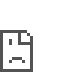
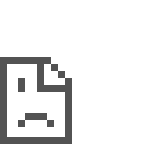
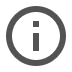
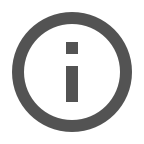
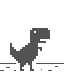
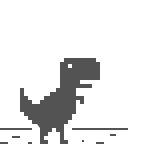
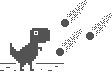
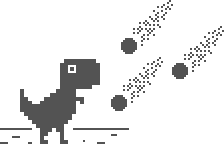
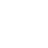
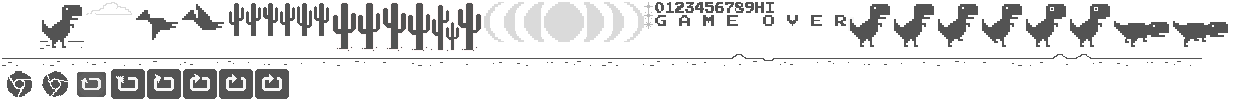
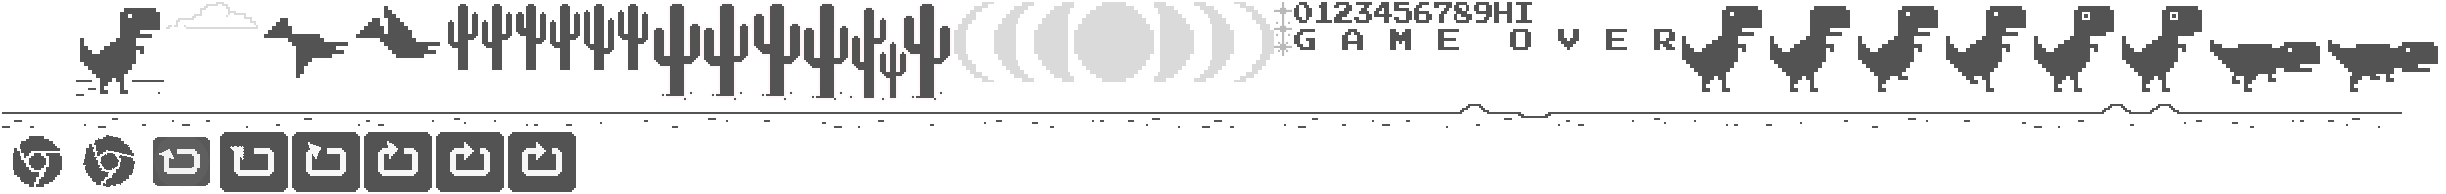

In [165]:
import time
import pickle
from selenium import webdriver
from selenium.webdriver.common.proxy import Proxy, ProxyType
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

def setup_driver_with_proxy(proxy_ip, proxy_port, proxy_user=None, proxy_pass=None):
    # Thiết lập các tùy chọn cho Chrome
    options = Options()
    # options.headless = True  # Bỏ comment nếu muốn chạy không giao diện
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('--disable-blink-features=AutomationControlled')
    options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36')

    # Thiết lập proxy
    if proxy_user and proxy_pass:
        proxy_auth = f"{proxy_user}:{proxy_pass}@{proxy_ip}:{proxy_port}"
        options.add_argument(f'--proxy-server=http://{proxy_auth}')
    else:
        options.add_argument(f'--proxy-server=http://{proxy_ip}:{proxy_port}')

    # Khởi tạo ChromeDriver với các tùy chọn
    service = Service()
    driver = webdriver.Chrome(service=service, options=options)
    return driver

def save_cookies(driver, file_path):
    with open(file_path, 'wb') as file:
        pickle.dump(driver.get_cookies(), file)

def load_cookies(driver, file_path):
    with open(file_path, 'rb') as file:
        cookies = pickle.load(file)
        for cookie in cookies:
            driver.add_cookie(cookie)

# Thông tin proxy
proxy_ip = "142.111.245.120"
proxy_port = "5987"
proxy_user = "ooxnfnkd"
proxy_pass = "7xfq6q25me19"

# Thiết lập và truy cập trang web lần đầu, sau đó lưu cookie
driver = setup_driver_with_proxy(proxy_ip, proxy_port, proxy_user, proxy_pass)
driver.get("https://www.amazon.com")
time.sleep(10)  # Chờ để đảm bảo trang đã tải và các cookie đã được thiết lập

# Lưu cookie vào tệp
save_cookies(driver, "amazon_cookies.pkl")
print("Cookies đã được lưu.")
driver.quit()

# Tải lại cookie và truy cập Amazon để tiếp tục phiên
driver = setup_driver_with_proxy(proxy_ip, proxy_port, proxy_user, proxy_pass)
driver.get("https://www.amazon.com")

# Tải cookie đã lưu
load_cookies(driver, "amazon_cookies.pkl")

# Làm mới trang để cookie có hiệu lực
driver.get("https://www.amazon.com")
time.sleep(10)
print(driver.page_source)
driver.quit()


In [174]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager



In [180]:
chrome_options = Options()
service = Service()

chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
proxy_path = 'extension_proxy.zip'
chrome_options.add_extension(proxy_path)
driver = webdriver.Chrome(options=chrome_options,service=ChromeService(ChromeDriverManager().install()))




<html lang="en-us" class=" a-js a-audio a-video a-canvas a-svg a-drag-drop a-geolocation a-history a-webworker a-autofocus a-input-placeholder a-textarea-placeholder a-local-storage a-gradients a-hires a-transform3d -scrolling a-text-shadow a-text-stroke a-box-shadow a-border-radius a-border-image a-opacity a-transform a-transition null" data-19ax5a9jf="dingo" data-aui-build-date="3.24.7-2024-09-17"><!-- sp:feature:head-start --><head><script async="" src="https://c.amazon-adsystem.com/bao-csm/forensics/a9-tq-forensics-incremental.min.js" crossorigin="anonymous"></script><script async="" src="https://images-na.ssl-images-amazon.com/images/I/31bJewCvY-L.js" crossorigin="anonymous"></script><style class="vjs-styles-defaults">
      .video-js {
        width: 300px;
        height: 150px;
      }

      .vjs-fluid {
        padding-top: 56.25%
      }
    </style><style class="vjs-styles-dimensions">
      .detailpage-imageblock-player-da15c2cc-3f06-4689-ad09-6f52bc842ecb-container-elemen
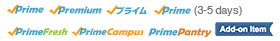

In [181]:
driver.get("https://www.amazon.com/Amazon-Basics-Portable-Adjustable-Notebook/dp/B0BLRJ4R8F/ref=sr_1_1_ffob_sspa?crid=308PGFJS67CHZ&dib=eyJ2IjoiMSJ9.x7SXXAasSYn-AMFYa5XT-fHbhjcFzPr7602MmpNtYkbf2rkOBVwBoRKGeC2P1ipXUQfXwUXcUJ3Fjk4V0IWHOezpX36B6CGTJj61eswPgG32G6nSf26-VF0tXPr-tHgHNuzWl8cMm7H_9ug6H2-TfQnj1cZxd-hMxPZqMjl6d6Sw_k4P-k-9WiZ7vxD-VkGEBBRPDMFbcKqUfeTom_OUXqoKKYEep3KkuHRt8m9eTnc.284jvmF_zKBt3zvtFi6ZXalmJ3rNTD3qpZyHRYUiI7s&dib_tag=se&keywords=laptop+stand&qid=1729327885&sprefix=%2Caps%2C290&sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1")
print(driver.page_source)
